# <center>PONTIFICIA UNIVERSIDAD CATÓLICA DEL ECUADOR</center>
### <center>Proyecto Final</center>  
### <center>CASO DE ESTUDIO: Análisis de sentimientos de los Centros de Atención del IESS en Quito </center>  

**Nombre: Kutik Gómez** 

## Objetivos

### Objetivo General
Implementar un sistema de aprendizaje automático para realizar un análisis de sentimiento de las opiniones de los usuarios sobre los Centros de Atención del IEES en Quito.
### Objetivos Específicos
* Extraer comentarios de Google Maps sobre Centros de Atención del IEES usando Web Scraper.
* Limpiar y preparar los comentarios extraídos de Google para su etiquetado adecuado.
* Modelar los datos utilizando técnicas de aprendizaje automático para el análisis de sentimiento.
* Evaluar el rendimiento del modelo de análisis de sentimiento.

## Extración, Limpieza y Preparación de los datos se encuentra las siguientes carpetas
* Fase de Extracción: Cuaderno Dataset_IEES
* Fase de Limpieza y Preparación:  Cuaderno Dataset_IEES_Balanceado


In [42]:
# Instalar las librerias necesarias para el trabajo
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import re
from textblob import TextBlob
import os
import matplotlib.pyplot as plt
# Para Nube de Palabras
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [43]:
# Leer el archivo de los datos balanceados que ya está procesado por la fase 1 y fase 2
datos = pd.read_csv('datosBalanceadosFin.csv')
datos.head()

,Comentarios,Sentimiento
0,es un excelente centro médico de atención lame...,neutro
1,buen servicio y excelente atención médica y at...,positivo
2,hospital nuevo tiene más o menos un año equipo...,positivo
3,instalaciones siguen en buenas condiciones es...,positivo
4,excelente hospital con un amplio parqueadero q...,positivo


In [44]:
datos.describe()

,Comentarios,Sentimiento
count,324,324
unique,324,3
top,es un excelente centro médico de atención lame...,neutro
freq,1,108


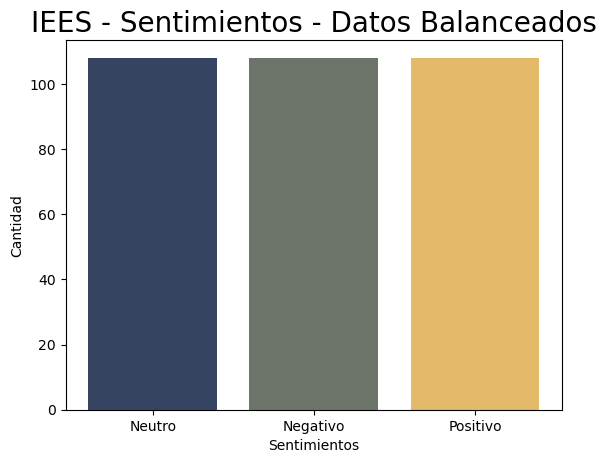

In [45]:
# Gráfico del dataset Balanceado
labels = ['Neutro', 'Negativo', 'Positivo']
colors = ['#364461', '#6d756a', '#e3ba6a']
counts = datos['Sentimiento'].value_counts()

plt.bar(labels, counts, color=colors)
plt.title('IEES - Sentimientos - Datos Balanceados', fontsize=20)
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad')
plt.show()

## Gráfico Nube de Palabras y Bigrama de Comentarios Negativos 

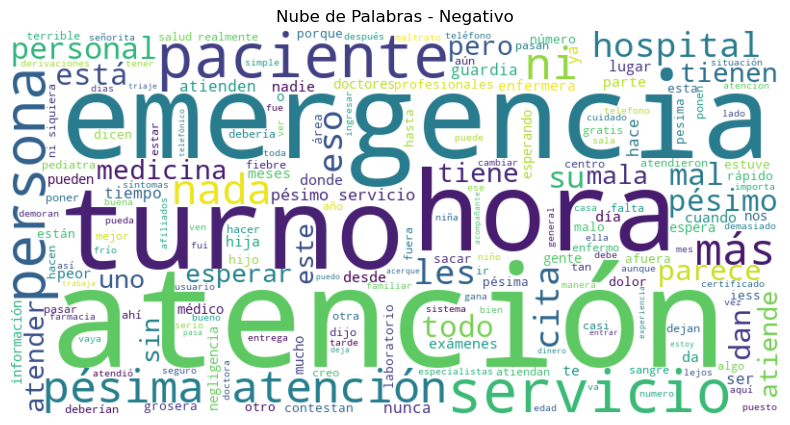

In [46]:
# Asegúrate de que la ruta al archivo sea correcta
file_path = 'datosBalanceadosFin.csv'  # Cambia esta ruta si el archivo está en otro lugar
datos = pd.read_csv(file_path)

# Filtrar los comentarios negativos
comentarios_negativos = ' '.join(datos[datos['Sentimiento'] == 'negativo']['Comentarios'])

# Definir stopwords en español y agregar a las stopwords predeterminadas
stopwords = set(STOPWORDS)
stopwords.update(["para", "por", "una", "con", "y", "de", "en", "que", 
                  "si","el", "la","mi", "muy","los", "las", "un", "es", 
                  "lo","le", "al", "se", "del", "hay", "son","solo"])

# Crear y mostrar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(comentarios_negativos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Negativo')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kutik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kutik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


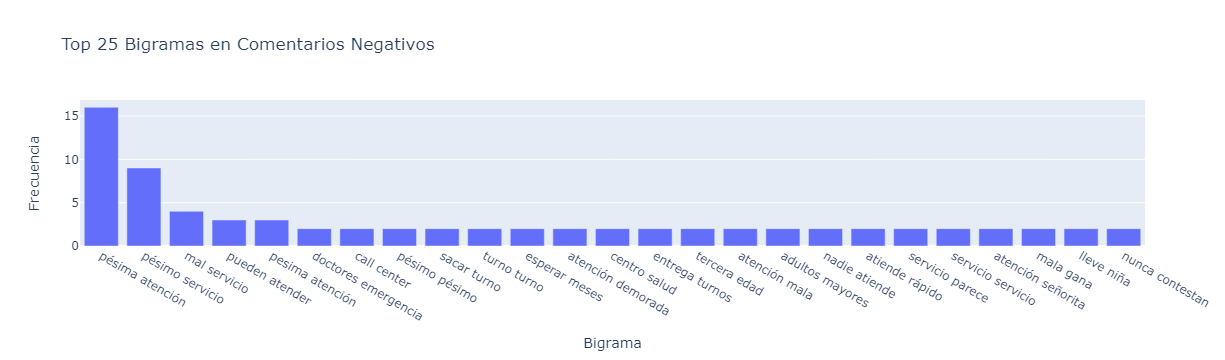

In [47]:
import plotly.express as px
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import nltk

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el dataset
file_path = 'datosBalanceadosFin.csv'  # Cambia esta ruta si el archivo está en otro lugar
datos = pd.read_csv(file_path)

# Filtrar los comentarios negativos
comentarios_negativos = datos[datos['Sentimiento'] == 'negativo']['Comentarios']

# Definir stopwords en español
stop_words = set(stopwords.words('spanish'))
custom_stopwords = {"para", "por", "una", "con", "y", "de", "en", "que", 
                  "si","el", "la","mi", "muy","los", "las", "un", "es", 
                  "lo","le", "al", "se", "del", "hay", "solo","son"}
stop_words.update(custom_stopwords)

# Tokenizar y limpiar comentarios
all_tokens = []
for comentario in comentarios_negativos:
    tokens = word_tokenize(comentario.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_tokens.extend(tokens)

# Crear bigramas
bigrams = list(ngrams(all_tokens, 2))

# Calcular frecuencia de bigramas
bigram_freq = FreqDist(bigrams)

# Seleccionar los 20 bigramas más comunes
common_bigrams = bigram_freq.most_common(25)

# Preparar datos para el gráfico
bigram_labels = [' '.join(bigram) for bigram, freq in common_bigrams]
frequencies = [freq for bigram, freq in common_bigrams]

# Crear un DataFrame con los datos de los bigramas
df_bigrams = pd.DataFrame({'Bigram': bigram_labels, 'Frequency': frequencies})

# Crear el gráfico de barras
fig = px.bar(df_bigrams, x='Bigram', y='Frequency',
             labels={'Bigram': 'Bigrama', 'Frequency': 'Frecuencia'},
             title='Top 25 Bigramas en Comentarios Negativos')

# Mostrar el gráfico
fig.show()

## Gráfico Nube de Palabras y Bigrama de Comentarios Positivo

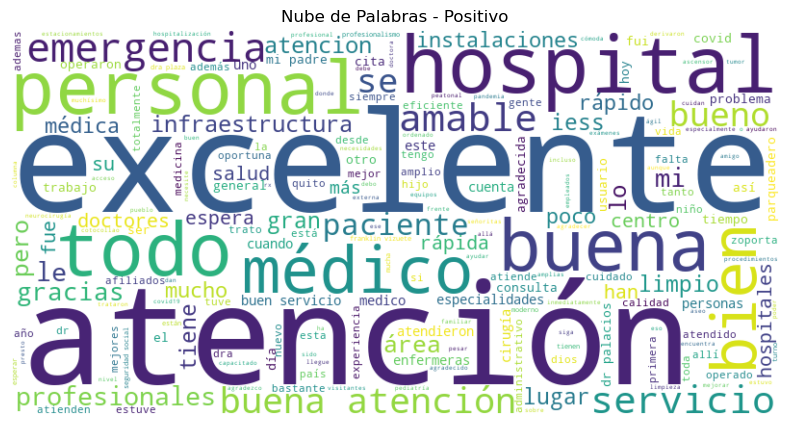

In [48]:
# Asegúrate de que la ruta al archivo sea correcta
file_path = 'datosBalanceadosFin.csv'  # Cambia esta ruta si el archivo está en otro lugar
datos = pd.read_csv(file_path)

# Filtrar los comentarios negativos
comentarios_negativos = ' '.join(datos[datos['Sentimiento'] == 'positivo']['Comentarios'])

# Definir stopwords en español y agregar a las stopwords predeterminadas
stopwords = set(STOPWORDS)
stopwords.update(["y","de", "e", "en", "con", "en", "que","para", "son", "del", "por", "muy", "un", "una", "hay", "al", "es"])

# Crear y mostrar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(comentarios_negativos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Positivo')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kutik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kutik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


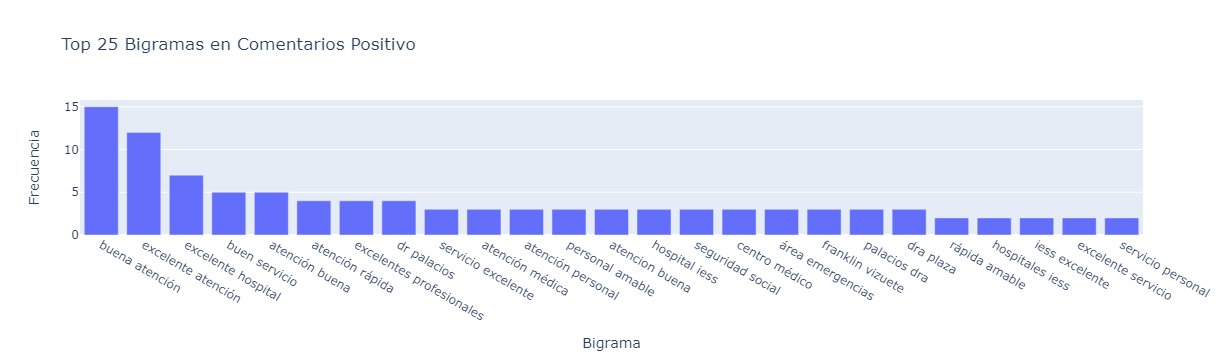

In [49]:
import plotly.express as px
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import nltk

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el dataset
file_path = 'datosBalanceadosFin.csv'  # Cambia esta ruta si el archivo está en otro lugar
datos = pd.read_csv(file_path)

# Filtrar los comentarios negativos
comentarios_negativos = datos[datos['Sentimiento'] == 'positivo']['Comentarios']

# Definir stopwords en español
stop_words = set(stopwords.words('spanish'))
custom_stopwords = {"y","de", "e", "en", "con", "en", "que","para", "son", "del", "por", "muy", "un", "una", "hay", "al", "es"}
stop_words.update(custom_stopwords)

# Tokenizar y limpiar comentarios
all_tokens = []
for comentario in comentarios_negativos:
    tokens = word_tokenize(comentario.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_tokens.extend(tokens)

# Crear bigramas
bigrams = list(ngrams(all_tokens, 2))

# Calcular frecuencia de bigramas
bigram_freq = FreqDist(bigrams)

# Seleccionar los 20 bigramas más comunes
common_bigrams = bigram_freq.most_common(25)

# Preparar datos para el gráfico
bigram_labels = [' '.join(bigram) for bigram, freq in common_bigrams]
frequencies = [freq for bigram, freq in common_bigrams]

# Crear un DataFrame con los datos de los bigramas
df_bigrams = pd.DataFrame({'Bigram': bigram_labels, 'Frequency': frequencies})

# Crear el gráfico de barras
fig = px.bar(df_bigrams, x='Bigram', y='Frequency',
             labels={'Bigram': 'Bigrama', 'Frequency': 'Frecuencia'},
             title='Top 25 Bigramas en Comentarios Positivo')

# Mostrar el gráfico
fig.show()

## Gráfico Nube de Palabras y Bigrama de Comentarios Neutro

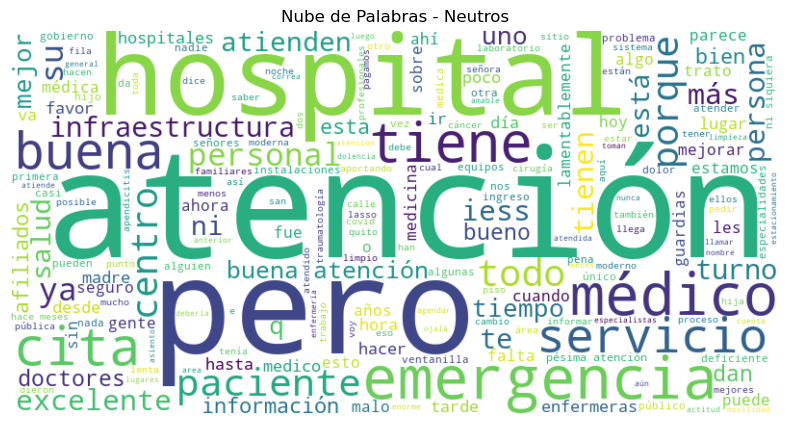

In [50]:
# Asegúrate de que la ruta al archivo sea correcta
file_path = 'datosBalanceadosFin.csv'  # Cambia esta ruta si el archivo está en otro lugar
datos = pd.read_csv(file_path)

# Filtrar los comentarios negativos
comentarios_negativos = ' '.join(datos[datos['Sentimiento'] == 'neutro']['Comentarios'])

# Definir stopwords en español y agregar a las stopwords predeterminadas
stopwords = set(STOPWORDS)
stopwords.update(["para", "por", "una", "con", "y", "de", "en", "que", 
                  "si","el", "la","mi", "muy","los", "las", "un", "es", 
                  "lo","le", "al", "se", "del", "hay", "son","solo", "este"])

# Crear y mostrar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(comentarios_negativos)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Neutros')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kutik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kutik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


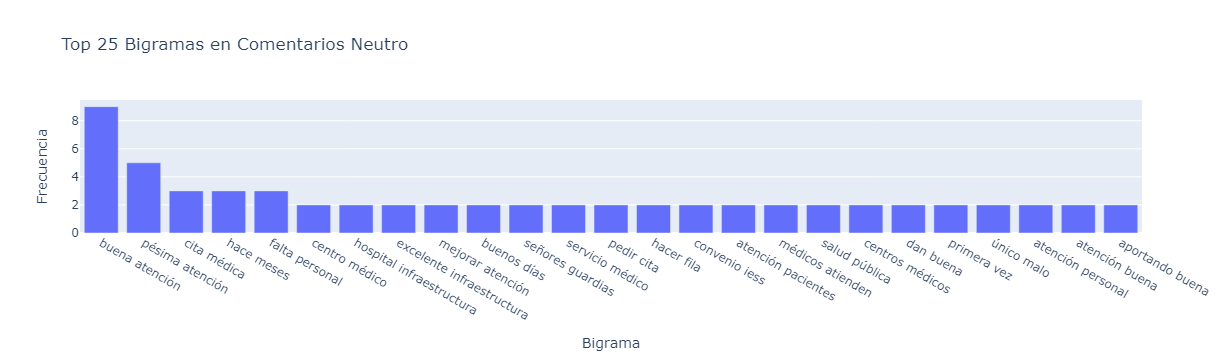

In [51]:
import plotly.express as px
from nltk import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
import nltk

# Descargar recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

# Cargar el dataset
file_path = 'datosBalanceadosFin.csv'  # Cambia esta ruta si el archivo está en otro lugar
datos = pd.read_csv(file_path)

# Filtrar los comentarios negativos
comentarios_negativos = datos[datos['Sentimiento'] == 'neutro']['Comentarios']

# Definir stopwords en español
stop_words = set(stopwords.words('spanish'))
custom_stopwords = {"para", "por", "una", "con", "y", "de", "en", "que", 
                  "si","el", "la","mi", "muy","los", "las", "un", "es", 
                  "lo","le", "al", "se", "del", "hay", "son","solo", "este"}
stop_words.update(custom_stopwords)

# Tokenizar y limpiar comentarios
all_tokens = []
for comentario in comentarios_negativos:
    tokens = word_tokenize(comentario.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    all_tokens.extend(tokens)

# Crear bigramas
bigrams = list(ngrams(all_tokens, 2))

# Calcular frecuencia de bigramas
bigram_freq = FreqDist(bigrams)

# Seleccionar los 20 bigramas más comunes
common_bigrams = bigram_freq.most_common(25)

# Preparar datos para el gráfico
bigram_labels = [' '.join(bigram) for bigram, freq in common_bigrams]
frequencies = [freq for bigram, freq in common_bigrams]

# Crear un DataFrame con los datos de los bigramas
df_bigrams = pd.DataFrame({'Bigram': bigram_labels, 'Frequency': frequencies})

# Crear el gráfico de barras
fig = px.bar(df_bigrams, x='Bigram', y='Frequency',
             labels={'Bigram': 'Bigrama', 'Frequency': 'Frecuencia'},
             title='Top 25 Bigramas en Comentarios Neutro')

# Mostrar el gráfico
fig.show()

# Modelado

## Regresión Lógistica

#### Cargar y explorar los datos 

In [52]:
# Importar las bibliotecas necesarias
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [53]:
# Cargar el dataset
df = pd.read_csv('datosBalanceadosFin.csv')

# Visualizar las primeras filas y verificar la estructura de los datos
print(df.head())

# Verificar la distribución de las clases (sentimientos)
print(df['Sentimiento'].value_counts())


                                         Comentarios Sentimiento
0  es un excelente centro médico de atención lame...      neutro
1  buen servicio y excelente atención médica y at...    positivo
2  hospital nuevo tiene más o menos un año equipo...    positivo
3   instalaciones siguen en buenas condiciones es...    positivo
4  excelente hospital con un amplio parqueadero q...    positivo
neutro      108
positivo    108
negativo    108
Name: Sentimiento, dtype: int64


#### Preprocesamiento de datos

In [54]:
# Definir características (X) y etiquetas (y)
X = df['Comentarios']
y = df['Sentimiento']

# Preprocesamiento de texto con TF-IDF
vectorizador = TfidfVectorizer(max_features=1500)
X_tfidf = vectorizador.fit_transform(X)

# Dividir el dataset en entrenamiento y prueba
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)


#### Modelado y evaluación

              precision    recall  f1-score   support

    negativo       0.70      0.70      0.70        33
      neutro       0.56      0.45      0.50        33
    positivo       0.71      0.84      0.77        32

    accuracy                           0.66        98
   macro avg       0.65      0.67      0.66        98
weighted avg       0.65      0.66      0.65        98



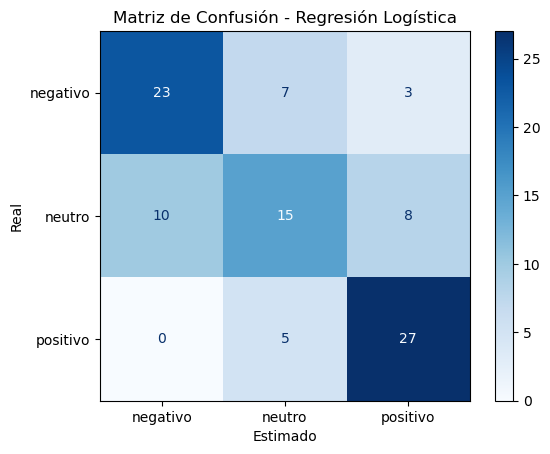

In [55]:
# Crear instancia del modelo de Regresión Logística
modelo_rl = LogisticRegression(max_iter=1000, random_state=42)

# Entrenar el modelo
modelo_rl.fit(X_entrenamiento, y_entrenamiento)

# Predecir con el conjunto de prueba
predicciones_rl = modelo_rl.predict(X_prueba)

# Reporte de clasificación
print(classification_report(y_prueba, predicciones_rl))

# Matriz de confusión
# Calcular la matriz de confusión para Regresión Logística
matriz_confusion_rl = confusion_matrix(y_prueba, predicciones_rl)

# Crear el objeto ConfusionMatrixDisplay
visualizacion_matriz_rl = ConfusionMatrixDisplay(confusion_matrix=matriz_confusion_rl, display_labels=['negativo', 'neutro', 'positivo'])

# Mostrar la matriz de confusión
visualizacion_matriz_rl.plot(cmap='Blues', values_format='d')

# Ajustar etiquetas y título
plt.xlabel('Estimado')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Regresión Logística')

plt.show()


#### Validación cruzada

In [56]:
# Validación cruzada
puntajes_cv_rl = cross_val_score(modelo_rl, X_tfidf, y, cv=5)

# Imprimir los resultados de la validación cruzada
print("Exactitud de cada fold:", puntajes_cv_rl)
print("Exactitud promedio:", puntajes_cv_rl.mean())

Exactitud de cada fold: [0.73846154 0.67692308 0.78461538 0.70769231 0.5       ]
Exactitud promedio: 0.6815384615384616


# Random Forest

#### Cargar y explorar los datos 

In [57]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [58]:
# Cargar el dataset
df = pd.read_csv('datosBalanceadosFin.csv')

# Visualizar las primeras filas y verificar la estructura de los datos
print(df.head())

# Verificar la distribución de las clases (sentimientos)
print(df['Sentimiento'].value_counts())


                                         Comentarios Sentimiento
0  es un excelente centro médico de atención lame...      neutro
1  buen servicio y excelente atención médica y at...    positivo
2  hospital nuevo tiene más o menos un año equipo...    positivo
3   instalaciones siguen en buenas condiciones es...    positivo
4  excelente hospital con un amplio parqueadero q...    positivo
neutro      108
positivo    108
negativo    108
Name: Sentimiento, dtype: int64


#### Preprocesamiento de datos

In [59]:
# Definir características (X) y etiquetas (y)
comentarios = df['Comentarios'].values
sentimientos = df['Sentimiento'].values

# Vectorización de texto con TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1500)
X = vectorizer.fit_transform(comentarios)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, sentimientos, test_size=0.3, random_state=42)


#### Modelado y evaluación

              precision    recall  f1-score   support

    negativo       0.62      0.73      0.67        33
      neutro       0.48      0.30      0.37        33
    positivo       0.66      0.78      0.71        32

    accuracy                           0.60        98
   macro avg       0.58      0.60      0.58        98
weighted avg       0.58      0.60      0.58        98



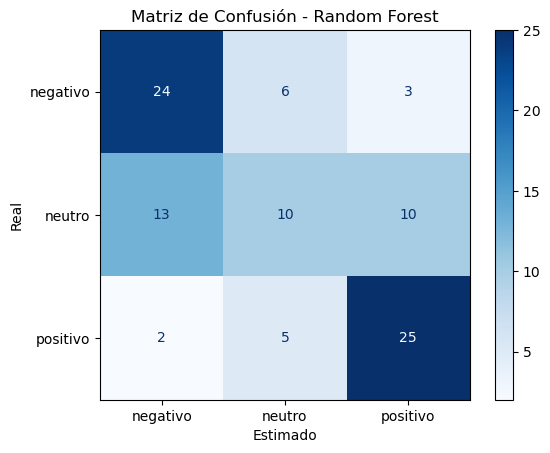

In [60]:
# Crear instancia del modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluación del rendimiento
print(classification_report(y_test, y_pred_rf))

# Matriz de confusión
# Calcular la matriz de confusión para Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Crear el objeto ConfusionMatrixDisplay
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['negativo', 'neutro', 'positivo'])

# Mostrar la matriz de confusión
disp_rf.plot(cmap='Blues', values_format='d')  # 'd' para mostrar valores enteros

# Ajustar etiquetas y título
plt.xlabel('Estimado')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Random Forest')

plt.show()


#### Validación cruzada

In [63]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada
scores_rf = cross_val_score(rf_model, X, sentimientos, cv=5)

# Imprimir los resultados de la validación cruzada
print("Exactitud de cada fold:", scores_rf)
print("Exactitud promedio:", np.mean(scores_rf))


Exactitud de cada fold: [0.61538462 0.69230769 0.63076923 0.67692308 0.46875   ]
Exactitud promedio: 0.6168269230769231


# SVM

#### Cargar y explorar los datos 

In [64]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
# Cargar el dataset
df = pd.read_csv('datosBalanceadosFin.csv')

# Visualizar las primeras filas y verificar la estructura de los datos
print(df.head())

# Verificar la distribución de las clases (sentimientos)
print(df['Sentimiento'].value_counts())

                                         Comentarios Sentimiento
0  es un excelente centro médico de atención lame...      neutro
1  buen servicio y excelente atención médica y at...    positivo
2  hospital nuevo tiene más o menos un año equipo...    positivo
3   instalaciones siguen en buenas condiciones es...    positivo
4  excelente hospital con un amplio parqueadero q...    positivo
neutro      108
positivo    108
negativo    108
Name: Sentimiento, dtype: int64


#### Preprocesamiento de datos

In [66]:
# Definir características (X) y etiquetas (y)
comentarios = df['Comentarios'].values
sentimientos = df['Sentimiento'].values

# Vectorización de texto con TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1500)
X = vectorizer.fit_transform(comentarios)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, sentimientos, test_size=0.2, random_state=42)


#### Modelado y evaluación

              precision    recall  f1-score   support

    negativo       0.70      0.64      0.67        22
      neutro       0.61      0.64      0.62        22
    positivo       0.73      0.76      0.74        21

    accuracy                           0.68        65
   macro avg       0.68      0.68      0.68        65
weighted avg       0.68      0.68      0.68        65



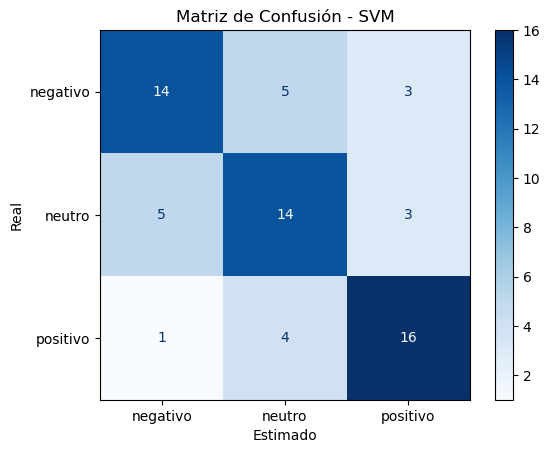

In [67]:
# Crear instancia del modelo SVM
svm_model = SVC(kernel='linear', random_state=42)

# Entrenar el modelo
svm_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_svm = svm_model.predict(X_test)

# Evaluación del rendimiento
print(classification_report(y_test, y_pred_svm))

# Matriz de confusión
# Calcular la matriz de confusión para SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Crear el objeto ConfusionMatrixDisplay
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['negativo', 'neutro', 'positivo'])

# Mostrar la matriz de confusión
disp_svm.plot(cmap='Blues', values_format='d')  # 'd' para mostrar valores enteros

# Ajustar etiquetas y título
plt.xlabel('Estimado')
plt.ylabel('Real')
plt.title('Matriz de Confusión - SVM')

plt.show()



#### Validación cruzada

In [68]:
# Realizar validación cruzada
scores_svm = cross_val_score(svm_model, X, sentimientos, cv=5)

# Imprimir los resultados de la validación cruzada
print("Exactitud de cada fold:", scores_svm)
print("Exactitud promedio:", np.mean(scores_svm))


Exactitud de cada fold: [0.70769231 0.67692308 0.72307692 0.70769231 0.484375  ]
Exactitud promedio: 0.6599519230769231


# DecisionTreeClassifier

#### Cargar y explorar los datos 

In [69]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [70]:
# Cargar el dataset
df = pd.read_csv('datosBalanceadosFin.csv')

# Visualizar las primeras filas y verificar la estructura de los datos
print(df.head())

# Verificar la distribución de las clases (sentimientos)
print(df['Sentimiento'].value_counts())

                                         Comentarios Sentimiento
0  es un excelente centro médico de atención lame...      neutro
1  buen servicio y excelente atención médica y at...    positivo
2  hospital nuevo tiene más o menos un año equipo...    positivo
3   instalaciones siguen en buenas condiciones es...    positivo
4  excelente hospital con un amplio parqueadero q...    positivo
neutro      108
positivo    108
negativo    108
Name: Sentimiento, dtype: int64


#### Preprocesamiento de datos

In [71]:
# Definir características (X) y etiquetas (y)
comentarios = df['Comentarios'].values
sentimientos = df['Sentimiento'].values

# Vectorización de texto con TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1500)
X = vectorizer.fit_transform(comentarios)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, sentimientos, test_size=0.2, random_state=42)

#### Modelado y evaluación

              precision    recall  f1-score   support

    negativo       0.50      0.45      0.48        22
      neutro       0.54      0.59      0.57        22
    positivo       0.57      0.57      0.57        21

    accuracy                           0.54        65
   macro avg       0.54      0.54      0.54        65
weighted avg       0.54      0.54      0.54        65



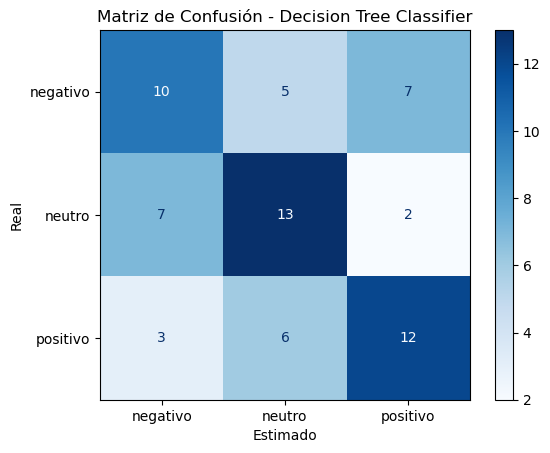

In [72]:
# Crear instancia del modelo Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
dt_model.fit(X_train, y_train)

# Predecir con el conjunto de prueba
y_pred_dt = dt_model.predict(X_test)

# Evaluación del rendimiento
print(classification_report(y_test, y_pred_dt))

# Matriz de confusión
from sklearn.metrics import ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_dt)

# Crear el objeto ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negativo', 'neutro', 'positivo'])

# Mostrar la matriz de confusión
disp.plot(cmap='Blues', values_format='d')  # 'd' para mostrar valores enteros

# Ajustar etiquetas y título
plt.xlabel('Estimado')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Decision Tree Classifier')

plt.show()

#### Validación cruzada

In [73]:
scores_dt = cross_val_score(dt_model, X, sentimientos, cv=5)

# Imprimir los resultados de la validación cruzada
print("Exactitud de cada fold:", scores_dt)
print("Exactitud promedio:", np.mean(scores_dt))


Exactitud de cada fold: [0.61538462 0.53846154 0.53846154 0.50769231 0.4375    ]
Exactitud promedio: 0.5275


# Conclusiones


* Como conclusión, durante la fase de extracción de datos se utilizó la herramienta 'Instant Data Scraper', una extensión que se instaló en el navegador y permitió realizar las descargas manuales de los comentarios en Google Maps de cada Centro de Atención del IEES en Quito, debido a que, era la única fuente de información disponible.
  
* Durante la fase de preparación de los datos los comentarios de cada Centro de Atención del IEES fueron unidos y limpiados adecuadamente, tomando en cuenta la normalización y la traducción al inglés para su respectiva etiqueta en Positivo, Neutro o Negativo, basándose en su polaridad para la calificación.
  
* Para la validación y selección de los comentarios, se utilizó ChatGPT para verificar si las etiquetas realizadas en el cuaderno de Jupyter eran válidas. Como resultado, el 60% de las etiquetas estaban correctas, mientras que el resto tuvo que ser seleccionado manualmente, eligiendo los comentarios más relevantes y con mayor cantidad de palabras. Esto permitió su uso en las visualizaciones de nubes de palabras y bigramas.

* Una vez balanceado el conjunto de datos con 108 instancias para cada etiqueta, se utilizaron nubes de palabras y bigramas para identificar términos característicos. En los comentarios negativos, se observó que los usuarios expresaban con mayor frecuencia preocupaciones sobre la atención en emergencias y turnos, describiéndola como "pésima". Por el contrario, en los comentarios positivos, la expresión más común fue "excelente atención de los médicos".

* Se seleccionaron cuatro modelos para el aprendizaje automático: Regresión Logística, Random Forest, SVM y DecisionTreeClassifier. Después del modelado y la evaluación de cada uno, el modelo que mejor se ajustó a los datos es la Regresión Logística, mostrando un rendimiento notable en la metrica F1-scores de 0.70 para la clase negativa y 0.77 para la clase positiva. Esto indica que la Regresión Logística es una elección adecuada para este problema de clasificación. Sin embargo, debido al menor volumen de datos en la etiqueta neutro estando balanceado, el modelo obtuvo un F1-score de 0.50 para esta clase. Esto sugiere que el rendimiento en la clase neutro podría mejorar con un mayor número de comentarios etiquetados como neutros y con una limpieza y normalización de datos más rigurosa. A su vez, esto también podría mejorar el rendimiento en las etiquetas negativas y positivas.

* Mediante la visualización de las Matrices de Confusión de los modelos evaluados, se observa que los cuatro modelos tienen un buen rendimiento en la clasificación de comentarios positivos, con clasificaciones correctas que van de 12 a 27. De igual forma, para los comentarios negativos, las clasificaciones correctas van entre 10 y 24. Sin embargo, una de las clasificaciones más delicadas identificadas son comentarios neutros, que presentan un menor rendimiento. Esto se puede mejorar aumentando el volumen de datos y asegurando una buena selección de comentarios que sean verdaderamente neutros.

* Por último, entre los cuatro modelos evaluados, el modelo Árbol de Decisión mostró el menor rendimiento con métricas inferiores a 0.50, lo que indica que no contribuye de manera significativa al aprendizaje automático en este contexto. Por lo tanto, los modelos más adecuados y recomendados son la Regresión Logística y SVM, puesto que, han demostrado tener un rendimiento superior a 0.70 y una mayor consistencia en la clasificación de comentarios.

 # Recomendaciones

* Como recomendación, para la extracción de datos utilizando la herramienta Instant Data Scraper, que permite descargar hasta 600 registros por página, es necesario descargar los datos por partes y luego unir todos los datasets, puesto que la misma herramienta mantiene una estructura que facilita la unión de todos los archivos en uno solo.
  
* En la fase de limpieza, se recomienda guardar los archivos después de cada proceso de limpieza realizado. De esta manera, el último archivo guardado será el dataset que ha pasado por un filtro y depuración, lo que ayuda a identificar de manera segura y facilita el siguiente proceso de preparación.

* Para la traducción de los comentarios, es necesario instalar la librería GoogleTranslator y tener buena conexión a Internet, puesto que, esta librería depende de la velocidad de la conexión para traducir grandes volúmenes de datos de manera eficiente.

* Al realizar la traducción y la calificación automática de la polaridad de los comentarios con Python, es necesario efectuar una revisión manual para validar que la clasificación de los comentarios como positivos, negativos o neutros sea correcta.

* Para garantizar el correcto funcionamiento de los scripts que utilizan una nueva biblioteca para la extracción, limpieza, visualización y modelado de datos, es necesario instalar la biblioteca correspondiente a través del terminal y luego importarla en el cuaderno. De lo contrario, podrían surgir errores y el script no funcionará adecuadamente en el procesamiento de los datos.

# Anexo

* Enlace al proyecto en GITHUB para la descarga completa de todo el contenido: https://github.com/Kutik-Gomez/analisis-sentimiento.git